<a href="https://colab.research.google.com/github/mikonistealscode/dl_lab/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32')/255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32')/255

In [ ]:
#normalizing pixel values between 0 and 1
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compiling

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

#evaluation

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.1121 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.1127 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 31ms/step - accuracy: 0.1128 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.1106 - loss: 2.3017 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.1125 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3011
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1160 - loss: 2.3011
Test Accuracy: 0.11349999904632568


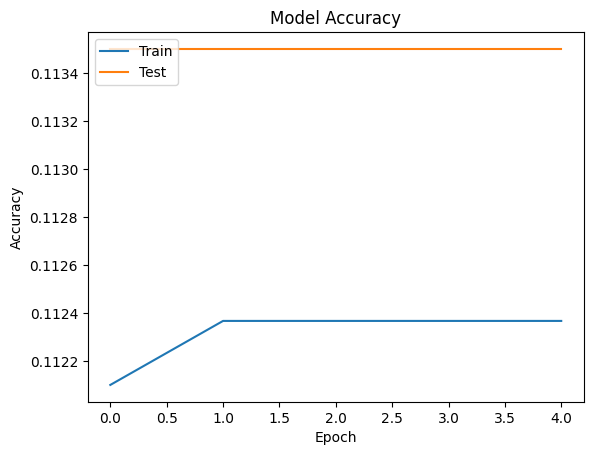

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

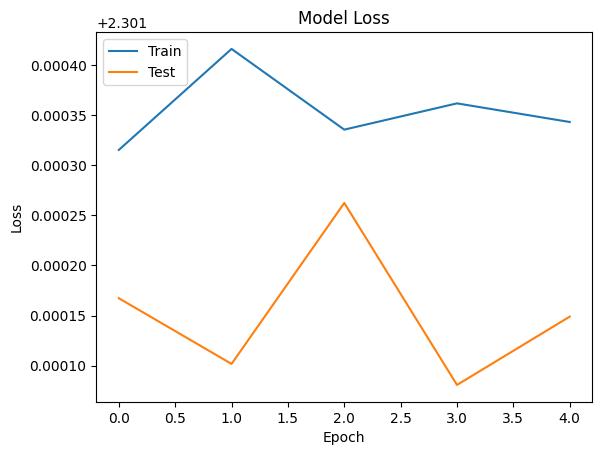

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#Failed Change

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard

In [9]:
#Resizing for ResNet
train_images = tf.image.resize(train_images, (32, 32))  # Resizing to 32x32
test_images = tf.image.resize(test_images, (32, 32))

train_images = tf.expand_dims(train_images, axis=-1) #.astype('float32') / 255
test_images = tf.expand_dims(test_images, axis=-1) #.astype('float32') / 255

# train_images = train_images.astype('float32') / 255
# test_images = test_images.astype('float32') / 255

train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0

train_images = tf.repeat(train_images, 3, axis=-1)
test_images = tf.repeat(test_images, 3, axis=-1)

ValueError: 'images' must have either 3 or 4 dimensions.

In [4]:
model2 = models.Sequential()
model2.add(layers.Conv2D(3, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(28, 28, 3))
base_model.trainable = False
model2.add(base_model)
model2.add(layers.GlobalAveragePooling2D())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Input size must be at least 32x32; Received: input_shape=(28, 28, 3)

#Changes

In [11]:
train_images = tf.image.resize(train_images, (32, 32))  # Resizingto 32x32
test_images = tf.image.resize(test_images, (32, 32))

train_images = tf.expand_dims(train_images, axis=-1)  # Adding a single channel dimension (32, 32, 1)
test_images = tf.expand_dims(test_images, axis=-1)

train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0

# Build the LeNet model
model2 = models.Sequential()
model2.add(layers.Conv2D(6, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 1)))
model2.add(layers.AvgPool2D((2, 2)))
model2.add(layers.Conv2D(16, (5, 5), activation='relu', padding='valid'))
model2.add(layers.AvgPool2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(120, activation='relu'))
model2.add(layers.Dense(84, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)

history = model2.fit(train_images, train_labels, epochs=5,
                     validation_data=(test_images, test_labels),
                     callbacks=[early_stopping, lr_scheduler, tensorboard])

# Evaluate the model
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,826 (323.54 KB)

 Trainable params: 82,826 (323.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.6041 - loss: 1.1353 - val_accuracy: 0.9237 - val_loss: 0.2543 - learning_rate: 0.0010
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 34ms/step - accuracy: 0.9273 - loss: 0.2333 - val_accuracy: 0.9560 - val_loss: 0.1452 - learning_rate: 0.0010
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9540 - loss: 0.1451 - val_accuracy: 0.9660 - val_loss: 0.1065 - learning_rate: 0.0010
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9650 - loss: 0.1110 - val_accuracy: 0.9718 - val_loss: 0.0869 - learning_rate: 0.0010
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9730 - loss: 0.0845 - val_accuracy: 0.9753 - val_loss: 0.0733 - learning_rate: 0.0010
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9705 - loss: 0.0849
Test Accuracy: 0.9753000140190125


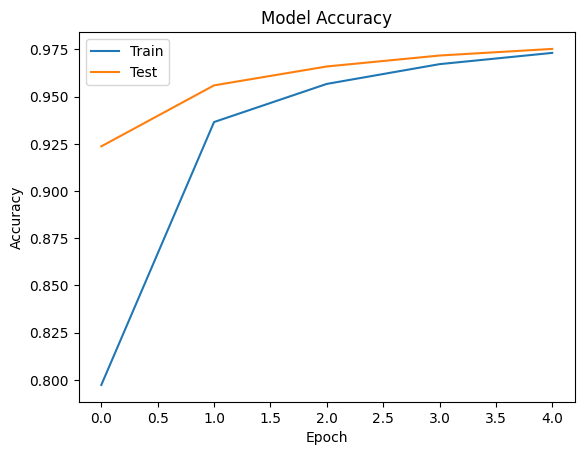

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

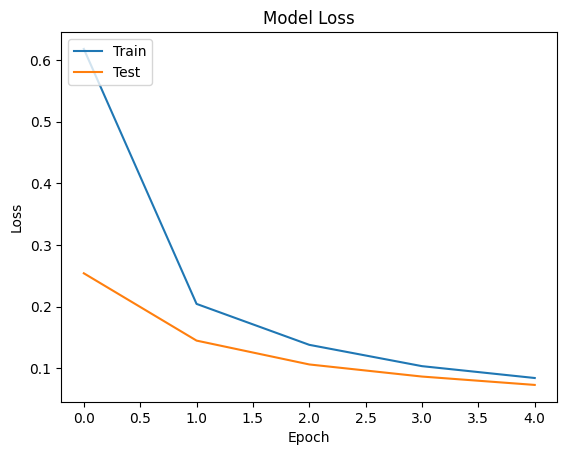

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()